In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings

print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 0


2025-07-20 10:37:54.263820: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [2]:
IMAGE_H = 256
IMAGE_W = 256
BATCH_SIZE = 32
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

train_generator = train_datagen.flow_from_directory(
    'insect_dataset/train',  
    target_size=(IMAGE_H, IMAGE_W),
    class_mode='sparse',
    
)

Found 500 images belonging to 5 classes.


In [3]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
)

validation_generator = validation_datagen.flow_from_directory(
    'insect_dataset/val',  
    target_size=(IMAGE_H, IMAGE_W),
    class_mode='sparse',
)

Found 150 images belonging to 5 classes.


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'insect_dataset/train',
    shuffle=True,
    image_size=(IMAGE_H, IMAGE_W),
)

Found 500 files belonging to 5 classes.


In [5]:
class_names = dataset.class_names
class_names 

['BUTTERFLY', 'DRAGONFLY', 'GRASSHOPPER', 'LADYBIRD', 'MOSQUITO']

In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
    'insect_dataset/test',
    target_size=(IMAGE_H, IMAGE_W),
    class_mode='sparse',
)

Found 75 images belonging to 5 classes.


In [7]:
input_shape = (IMAGE_H, IMAGE_W, CHANNELS)
n_classes = 5

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

/home/ferpaolo/tf-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,770,725 (56.35 MB)

 Trainable params: 14,770,725 (56.35 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [10]:
299/32

9.34375

In [11]:
model.fit(
    train_generator,
    validation_data=validation_generator,
    verbose=1,
    shuffle=True,
    epochs=5,
)

/home/ferpaolo/tf-env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 914ms/step - accuracy: 0.1869 - loss: 2.2477

/home/ferpaolo/tf-env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1872 - loss: 2.2264 - val_accuracy: 0.2533 - val_loss: 1.5329
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 623ms/step - accuracy: 0.3647 - loss: 1.5169 - val_accuracy: 0.4867 - val_loss: 1.3553
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 665ms/step - accuracy: 0.4273 - loss: 1.3624 - val_accuracy: 0.5467 - val_loss: 1.2153
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step - accuracy: 0.4926 - loss: 1.2220 - val_accuracy: 0.5867 - val_loss: 1.0786
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 616ms/step - accuracy: 0.5648 - loss: 1.1760 - val_accuracy: 0.6133 - val_loss: 1.0381


In [12]:
scores = model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.5629 - loss: 1.0761


First image to predict:


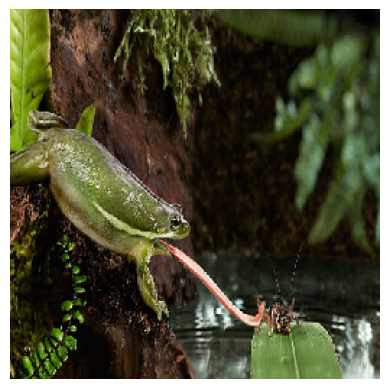

actual label: GRASSHOPPER
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
predicted label: GRASSHOPPER


In [13]:
import numpy as np

for image_batch, labels_batch in test_generator:
    
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()
    print("actual label:", class_names[first_label])
    
    batch_predictions = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_predictions[0])])
    
    break

In [14]:
def predict(model, img):
    # Assume `img` is already a single image array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


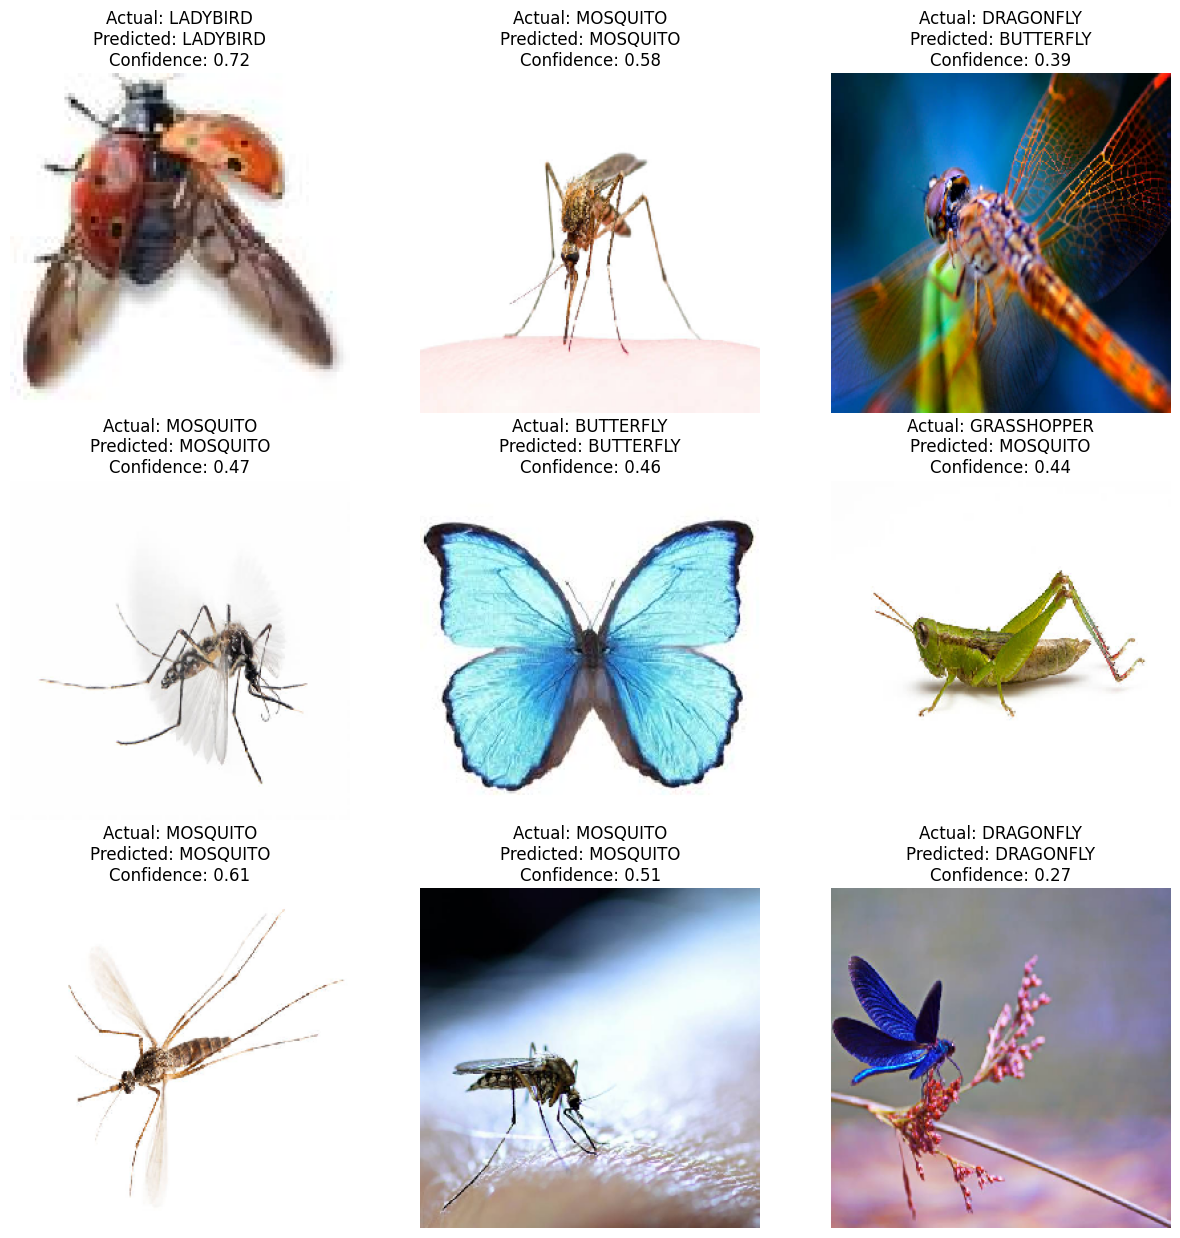

In [15]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}")
        plt.axis("off")
    break


In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('insect_recognition_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp7s3obhuj/assets


INFO:tensorflow:Assets written to: /tmp/tmp7s3obhuj/assets


Saved artifact at '/tmp/tmp7s3obhuj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140245715995920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715996880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715994960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715994576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715997456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715996304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715996112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715996688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715994384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245715995728: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1752979147.171997    4733 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1752979147.172207    4733 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-07-20 10:39:07.174487: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp7s3obhuj
2025-07-20 10:39:07.175425: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-07-20 10:39:07.175441: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp7s3obhuj
I0000 00:00:1752979147.181870    4733 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-07-20 10:39:07.182765: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-07-20 10:39:07.258772: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp7s3obhuj
2025-07-20 10:39:07.267045: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 